INPUT:
CSV file with the headers ("Chance_of_Attendance,Party_Size") on the first line.  Each line then contains two values separated by a comma.  The first value is the chance of that guest party attending the wedding.  The second number is the total number of people in that guest party (single, couple, family).

ASSUMPTIONS:
1. Either the whole party attends, or none of the party attends.
1. The user did a fantastic job exactly predicting the chances each guest party attends.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from tabulate import tabulate

# Importing and reading CSV file provided by user
df = pd.read_csv('wedding_guests.csv')

# can adjust number of simulations to increase accuracy at expense of runtime
num_simulations = 10000
sim_results = []

for i in range(num_simulations):
  # randomly determine if each party will be attending this instance of the wedding using weighted probabilities provided in the user CSV input
  df['Attending?'] = df.apply(lambda row: np.random.choice([1,0],p=[row.Chance_of_Attendance, 1-row.Chance_of_Attendance]),axis=1)

  df['Attending_Size'] = df['Party_Size'] * df['Attending?']

  sim_results.append([
  df['Attending?'].sum(),
  df['Attending_Size'].mean(),
  df['Attending_Size'].sum().round(0)])

# aggregate all of the sim information and print a summary
results_df = pd.DataFrame.from_records(sim_results, columns=['Parties Attending','Average Party Size','Total Attendees'])

results_df.describe().style.format(precision=2)

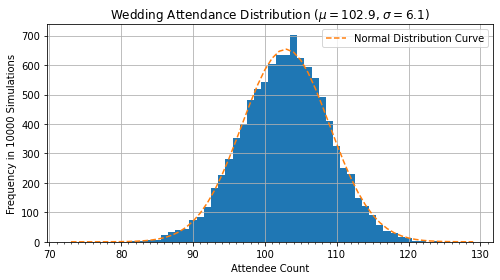

In [2]:
## create a histogram plot to visually communicate the results of the analysis

# ensure each bin is 1 person wide
bin_sizing = range(results_df['Total Attendees'].min()-5,results_df['Total Attendees'].max()+5,1)

# create initial histogram
ax = results_df['Total Attendees'].plot(kind='hist', bins=bin_sizing, align='left', figsize=(8,4))

# pre-calculate values for title and labels
sim_mean = results_df['Total Attendees'].mean().round(1)
sim_std = results_df['Total Attendees'].std().round(1)

# format and add info to the plot
ax.set_title(f'Wedding Attendance Distribution ($\mu=${sim_mean}, $\sigma=${sim_std})')
ax.set_xlabel('Attendee Count')
ax.set_ylabel(f'Frequency in {num_simulations} Simulations')
ax.xaxis.set_minor_locator(plt.ticker.MultipleLocator(1))
ax.grid(which='major', axis='both')

# calculate the normal distribution curve to show it fits
y = ((1 / (np.sqrt(2 * np.pi) * sim_std)) * np.exp(-0.5 * (1 / sim_std * (bin_sizing - sim_mean))**2))
ax.plot(bin_sizing, y*num_simulations, '--')
ax.legend(['Normal Distribution Curve'])


In [3]:
## provide a verbal explanation of the data with key takeaways

total_invited = df['Party_Size'].sum()
sim_max = results_df['Total Attendees'].max()

print(f"Typically, wedding websites will tell you to expect 80% of your invitees to attend.  You have invited {total_invited} people to the wedding.  The 80% rule would tell you to expect {round(0.8*total_invited)} people.  The highest attendance count seen in {num_simulations} simulations was {sim_max} people.\n")

print(f"The Monte Carlo Analysis using {num_simulations} simulations matches the form of a normal distribution with a mean of {sim_mean} people and a standard deviation of {sim_std} people.  Using this normalized distribution characterization, the table below provides estimates of attendance ranges along with their likelihood.\n")

headers = ['Confidence','Range Minimum', 'Range Maximum', '\u03C3']
table_data = [
  ['84.13%',0,0,'1\u03C3'],
  ['93.32%',0,0,'1.5\u03C3'],
  ['97.73%',0,0,'2\u03C3'],
  ['99.38%',0,0,'2.5\u03C3'],
  ['99.87%',0,0,'3\u03C3'],
  ['99.98%',0,0,'3.5\u03C3'],
]
sigma = 1

for row in range(len(table_data)):
  table_data[row][1] = sim_mean - sigma * sim_std
  table_data[row][2] = sim_mean + sigma * sim_std
  sigma += 0.5

print("*"*13 + "ATTENDANCE RANGES WITH CONFIDENCE" + "*"*13 + "\n")
print(tabulate(table_data,headers=headers, tablefmt='orgtbl', numalign='center', stralign='center'))

Typically, wedding websites will tell you to expect 80% of your invitees to attend.  You have invited 148 people to the wedding.  The 80% rule would tell you to expect 118 people.  The highest attendance count seen in 10000 simulations was 125 people.

The Monte Carlo Analysis using 10000 simulations matches the form of a normal distribution with a mean of 102.9 people and a standard deviation of 6.1 people.  Using this normalized distribution characterization, the table below provides estimates of attendance ranges along with their likelihood.

*************ATTENDANCE RANGES WITH CONFIDENCE*************

|  Confidence  |  Range Minimum  |  Range Maximum  |  σ   |
|--------------+-----------------+-----------------+------|
|    84.13%    |      96.8       |       109       |  1σ  |
|    93.32%    |      93.75      |     112.05      | 1.5σ |
|    97.73%    |      90.7       |      115.1      |  2σ  |
|    99.38%    |      87.65      |     118.15      | 2.5σ |
|    99.87%    |      84.6 